In [1]:
#!pip install numpy maptlotlib mpld3

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [3]:
PROJECT_ROOT_DIR=Path("../../../").resolve()
assert PROJECT_ROOT_DIR.exists()
DATA_PATH = PROJECT_ROOT_DIR / 'data'
assert DATA_PATH.exists()
DATA_PATH_STRING = str(DATA_PATH)

In [4]:
# you need to compile the project with -DAARE_PYTHON_BINDINGS="ON"
sys.path.append(str((PROJECT_ROOT_DIR / 'build').resolve()))
# check if _aare can be imported
import importlib.util
_aare_module = importlib.util.find_spec("_aare")
assert _aare_module is not None


# File

In [5]:
from _aare import File

In [6]:
# eiger json master file
file = File(DATA_PATH_STRING + "/eiger/eiger_500k_32bit_master_0.json")
print(file.rows,file.cols,file.bitdepth)
print(file.detector_type)
print(file.total_frames)
print("geometry",file.geometry)

512 1024 32
DetectorType.Eiger
3
geometry <xy: row=2, col=2>


In [7]:
from _aare import DetectorType
list(DetectorType.__entries) # DetectorType is an enum

['Jungfrau', 'Eiger', 'Mythen3', 'Moench', 'ChipTestBoard', 'Unknown']

In [8]:
# Frame class

In [9]:
frame = file.read() # read frame from current position
frame

In [10]:
frame.rows,frame.cols,frame.bitdepth,frame.size

(512, 1024, 32, 2097152)

In [11]:
frame.array() # returns a numpy array of type unsigned int 

array([[915, 906, 857, ..., 736, 721, 830],
       [465, 453, 426, ..., 324, 359, 409],
       [417, 394, 432, ..., 316, 336, 383],
       ...,
       [415, 409, 366, ..., 369, 366, 403],
       [391, 355, 389, ..., 369, 397, 422],
       [398, 374, 409, ..., 425, 376, 427]], dtype=uint32)

In [12]:
file.iread(1) # read frame at index 1 (only complete frames are returned)
pos = file.tell() # get the index file is currently pointed to
print("pos",pos)
file.seek(0) # go to index 0
file.read(3) # read three frames. returns list of frames
# file.write(file.iread(0))

pos 1


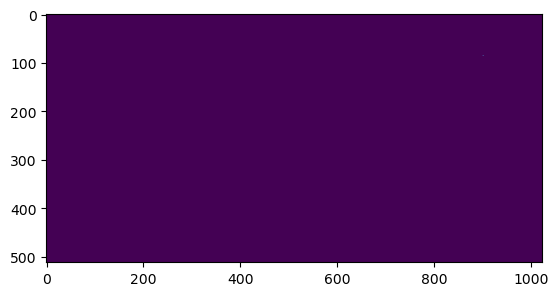

In [13]:
# plot frame
plt.imshow(frame.array())
plt.show()

# ClusterFile

In [14]:
from _aare import ClusterFileV2

In [15]:
file = ClusterFileV2(DATA_PATH_STRING + "/clusters/beam_En700eV_-40deg_300V_10us_d0_f0_100.clust","r")
file

In [16]:
file.read() # returns a list of the clusters of the current frame number

[<ClusterV2: frame_number: 17570001, x: 248, y: 30>,
 <ClusterV2: frame_number: 17570001, x: 233, y: 32>,
 <ClusterV2: frame_number: 17570001, x: 252, y: 34>,
 <ClusterV2: frame_number: 17570001, x: 255, y: 34>,
 <ClusterV2: frame_number: 17570001, x: 289, y: 35>,
 <ClusterV2: frame_number: 17570001, x: 271, y: 36>,
 <ClusterV2: frame_number: 17570001, x: 236, y: 39>,
 <ClusterV2: frame_number: 17570001, x: 229, y: 40>,
 <ClusterV2: frame_number: 17570001, x: 230, y: 40>,
 <ClusterV2: frame_number: 17570001, x: 251, y: 41>,
 <ClusterV2: frame_number: 17570001, x: 309, y: 41>,
 <ClusterV2: frame_number: 17570001, x: 224, y: 42>,
 <ClusterV2: frame_number: 17570001, x: 224, y: 43>,
 <ClusterV2: frame_number: 17570001, x: 314, y: 44>,
 <ClusterV2: frame_number: 17570001, x: 241, y: 46>,
 <ClusterV2: frame_number: 17570001, x: 303, y: 46>,
 <ClusterV2: frame_number: 17570001, x: 262, y: 48>,
 <ClusterV2: frame_number: 17570001, x: 265, y: 48>,
 <ClusterV2: frame_number: 17570001, x: 316, y

In [17]:
file.read(2) # returns a list of clusters for two frames

[[<ClusterV2: frame_number: 17570004, x: 244, y: 30>,
  <ClusterV2: frame_number: 17570004, x: 259, y: 30>,
  <ClusterV2: frame_number: 17570004, x: 279, y: 34>,
  <ClusterV2: frame_number: 17570004, x: 292, y: 34>,
  <ClusterV2: frame_number: 17570004, x: 249, y: 35>,
  <ClusterV2: frame_number: 17570004, x: 277, y: 35>,
  <ClusterV2: frame_number: 17570004, x: 292, y: 35>,
  <ClusterV2: frame_number: 17570004, x: 281, y: 36>,
  <ClusterV2: frame_number: 17570004, x: 297, y: 37>,
  <ClusterV2: frame_number: 17570004, x: 225, y: 38>,
  <ClusterV2: frame_number: 17570004, x: 256, y: 38>,
  <ClusterV2: frame_number: 17570004, x: 250, y: 40>,
  <ClusterV2: frame_number: 17570004, x: 299, y: 41>,
  <ClusterV2: frame_number: 17570004, x: 299, y: 42>,
  <ClusterV2: frame_number: 17570004, x: 274, y: 43>,
  <ClusterV2: frame_number: 17570004, x: 238, y: 44>,
  <ClusterV2: frame_number: 17570004, x: 279, y: 44>,
  <ClusterV2: frame_number: 17570004, x: 280, y: 44>,
  <ClusterV2: frame_number: 

In [18]:
file.frame_number() # get the frame number where clusterFile currently points to

17570003

In [19]:
clusters = file.read()
len(clusters)

426

In [20]:
cluster = clusters[0]
print(cluster.frame_number, cluster.cluster.x,cluster.cluster.y) # get cluster information
np.array(cluster.cluster.data,np.int32) # view cluster data 

17570003 279 31


array([ 12,  -7,  11,  27, 427,  -9,  26,  70,   4], dtype=int32)

# Pedestal

In [21]:
from _aare import Pedestal
file = File("/mnt/sls_det_storage/moench_data/testNewFW20230714/cu_half_speed_master_4.json")
file.rows,file.cols,file.detector_type

(400, 400, <DetectorType.Moench: 3>)

In [22]:
pedestal = Pedestal(file.rows,file.cols)
pedestal.rows,pedestal.cols,pedestal.n_samples

(400, 400, 1000)

In [23]:
ndarray = pedestal.mean() # pedestal mean returns an internal NDArray object of type float8 and dimensions 2
ndarray

In [24]:
np.array(ndarray) # to convert NDArray to numpy array with copying the data
np.array(ndarray,copy=False) # to convert NDArray to numpy array without copying the data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
ndarray.shape,ndarray.size,ndarray.bitdepth,ndarray.strides,ndarray.byte_strides

([400, 400], 160000, 64, [400, 1], [3200, 8])

In [26]:
ndarray[0,300]

0.0

In [27]:
for i in range(2000):
    frame = file.iread(i)
    pedestal.push(frame) # push 2000 frames into the pedestal
    

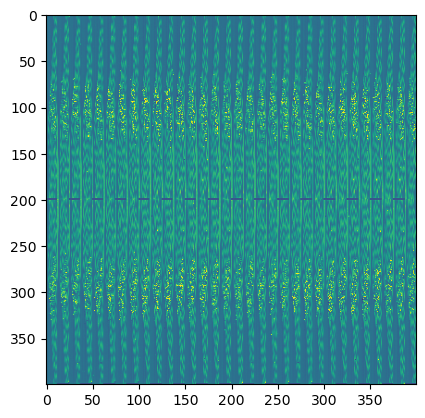

In [29]:
mean = np.array(pedestal.mean())
plt.imshow(mean)
plt.show()


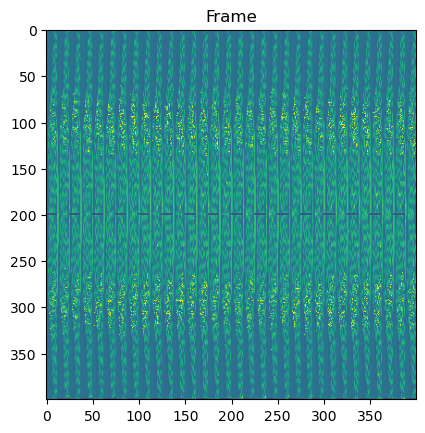

In [30]:
frame=file.iread(3000) # read frame at index 3000
plt.imshow(frame.array())
plt.title("Frame")
plt.show()

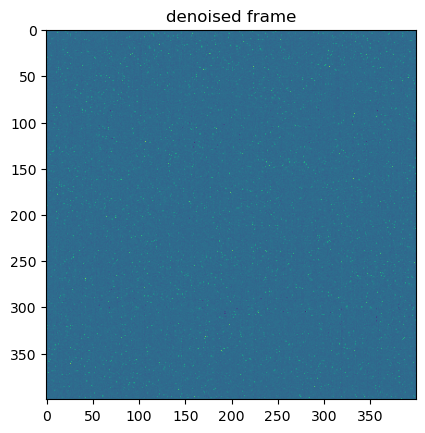

In [31]:
frame=file.iread(3000) # read frame at index 3000
denoised_frame = frame.array()-pedestal.mean()
plt.imshow(denoised_frame)
plt.title("denoised frame")
plt.show()

In [34]:
#other utilities in pedestal
pedestal.variance() # get NDArray of the variance for each pixel 
pedestal.standard_deviation() # get NDArray of the standard deviation for each pixel 
pedestal.sum # get NDArray of the sum squared for each pixel 
pedestal.sum2 # get NDArray of the sum squared for each pixel 
pedestal.clear() # resets the pedestal
# mean, variance, standard_deviation and clear can accept indexes to apply only specific pixels
row,col=0,0
pedestal.mean(row,col)
pedestal.variance(row,col)
pedestal.standard_deviation(row,col)
pedestal.clear(row,col)

# ClusterFinder

In [35]:
from _aare import ClusterFinder

In [36]:
cf = ClusterFinder(3,3,1.0,1) # cluster_sizeX, cluster_sizeY, nSigma, threshold (can be ignored depending on the function called later)

In [37]:
clusters = cf.find_clusters_without_threshold(denoised_frame,pedestal)
len(clusters)

17629

In [ ]:
# x_arr,y_arr=[],[]
# for cluster in clusters:
#     denoised_frame[cluster.x,cluster.y]=-1000
# plt.imshow(denoised_frame)
# plt.show()